In [1]:
#import required modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import itertools
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
#load file
DIR = "C:/Users/olgaa/Desktop/Sebas/Thesis/Results/GeneralizedDistanceVSIterations/"
ext = ".json"

In [2]:
def loadFile(file):
    with open(DIR + file + ext) as json_file:
        data = json.load(json_file)
        return data

In [3]:
def graphFunction(solver, ymin = None, ymax = None, step = 5, offset = 5, info = "", linthresh = 0.001, log = True):
    fig, ax = plt.subplots(figsize=(15,5))
    its = len(solver["min"])
    #ax.plot(solver["min"], 'C0', label = 'mininum error', marker = ".")
    ax.plot(solver["mean"], 'C2', label = 'mean', marker = ".")
    #ax.plot(solver["max"], 'c', label = 'maximum error', marker = ".")
    if(log): ax.set_yscale('symlog', linthreshy = linthresh, linscale = 6)
    else:
        ax.errorbar([x for x in range(0,its,step)], solver["mean"][::step], solver["std"][::step], linestyle='None', marker='o', color = 'C2')    
    
    ax.set_ylabel('Distance between target and end effector')
    ax.set_xlabel('Iterations')
    ax.set_title('Evolution of distance between target and effector as the number of iterations increases' + info)
    ax.legend(loc='upper left')
    plt.show()

In [4]:
def graphBenchmark(solvers, ymin = None, ymax = None, step = 5, offset = 5, info = "", linthresh = 0.001, log = True):
    fig, ax = plt.subplots(figsize=(15,5))
    its = len(solvers[0]["min"])
    N = len(solvers)
    colormap = mpl.cm.Dark2.colors   # Qualitative colormap
    for i,color in zip(range(N),colormap):
        ax.plot(solvers[i]["mean"], color = color, label = solvers[i]["name"], marker = ".")    
        if(log): ax.set_yscale('symlog', linthreshy = linthresh, linscale = 6)
    
    ax.set_ylabel('Mean distance between target and end effector')
    ax.set_xlabel('Iterations')
    ax.set_title('Evolution of mean distance between target and effector as the number of iterations increases' + info)
    ax.legend(loc='upper left')
    plt.show()

In [5]:
def plotStats(file_name, name, step = 5, offset = 5, info = "", linthresh = 0.001, log = True):
    file = loadFile(file_name)
    solver = file[name]
    graphFunction(solver, step = step, offset = offset, info = info, linthresh = linthresh, log = log)
    print("best : " + str(solver["min"][-1]))    
    print("worst : " + str(solver["max"][-1]))    
    print("avg : " + str(solver["mean"][-1]) + " std : " + str(solver["std"][-1]))    
    return stats["min"][-1]

In [6]:
def plotBenchmarkStats(file_name, step = 5, offset = 5, info = "", linthresh = 0.001, log = True):
    file = loadFile(file_name)
    graphBenchmark(file["solvers"], step = step, offset = offset, info = info, linthresh = linthresh, log = log)


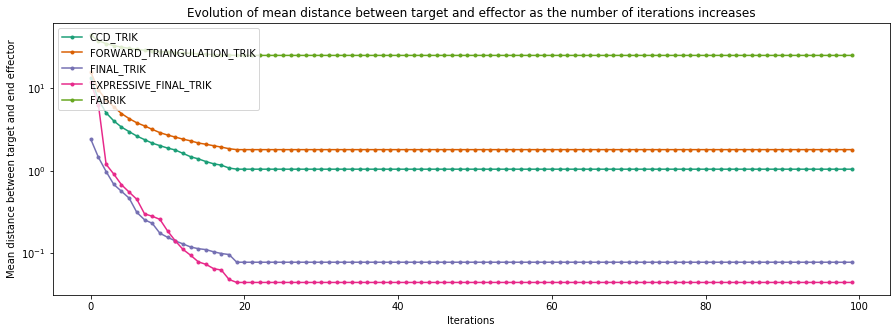

In [7]:
#Average over random topologies
file_name = "discontinuous_path_joints_16_postures_100_structures_100_seed_0"
plotBenchmarkStats(file_name, step = 5, offset = 5, info = "", linthresh = 0.01, log = True)

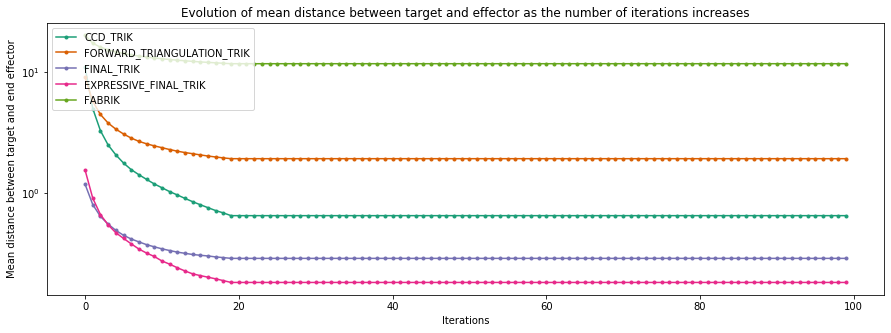

In [148]:
#Average over random topologies
file_name = "discontinuous_path_joints_19_postures_100_structures_1000_seed_0"
plotBenchmarkStats(file_name, step = 5, offset = 5, info = "", linthresh = 0.01, log = True)

In [169]:
#graph histogram
def plotHist(file, info = "", min_order = -8, bins = 100, log = True):
    file = loadFile(file_name)
    solvers = file["solvers"]
    N = len(solvers)
    fig = plt.figure(figsize=(15,8 * N))
    colormap = mpl.cm.Dark2.colors   # Qualitative colormap
    for i,color in zip(range(N),colormap):
        ax = fig.add_subplot(N, 1 , i + 1)
        hist = np.array(solvers[i]["hist"])
        if(log):
            hist[hist <= 10 ** min_order] = 10 ** min_order
            ax.set_xscale('symlog', linthreshx = 10 ** (min_order))
            logbins = np.geomspace(hist.min(), hist.max(), bins)        
            ax.hist(hist, bins = logbins, color = color, label = solvers[i]["name"])
        else:
            ax.hist(hist, bins = bins, color = color, label = solvers[i]["name"])
        
        ax.set_ylabel('Number of solutions')
        ax.set_xlabel('Mean distance between target and end effector')
        ax.set_title(solvers[i]["name"] + ' Histogram' + info)
    plt.show()


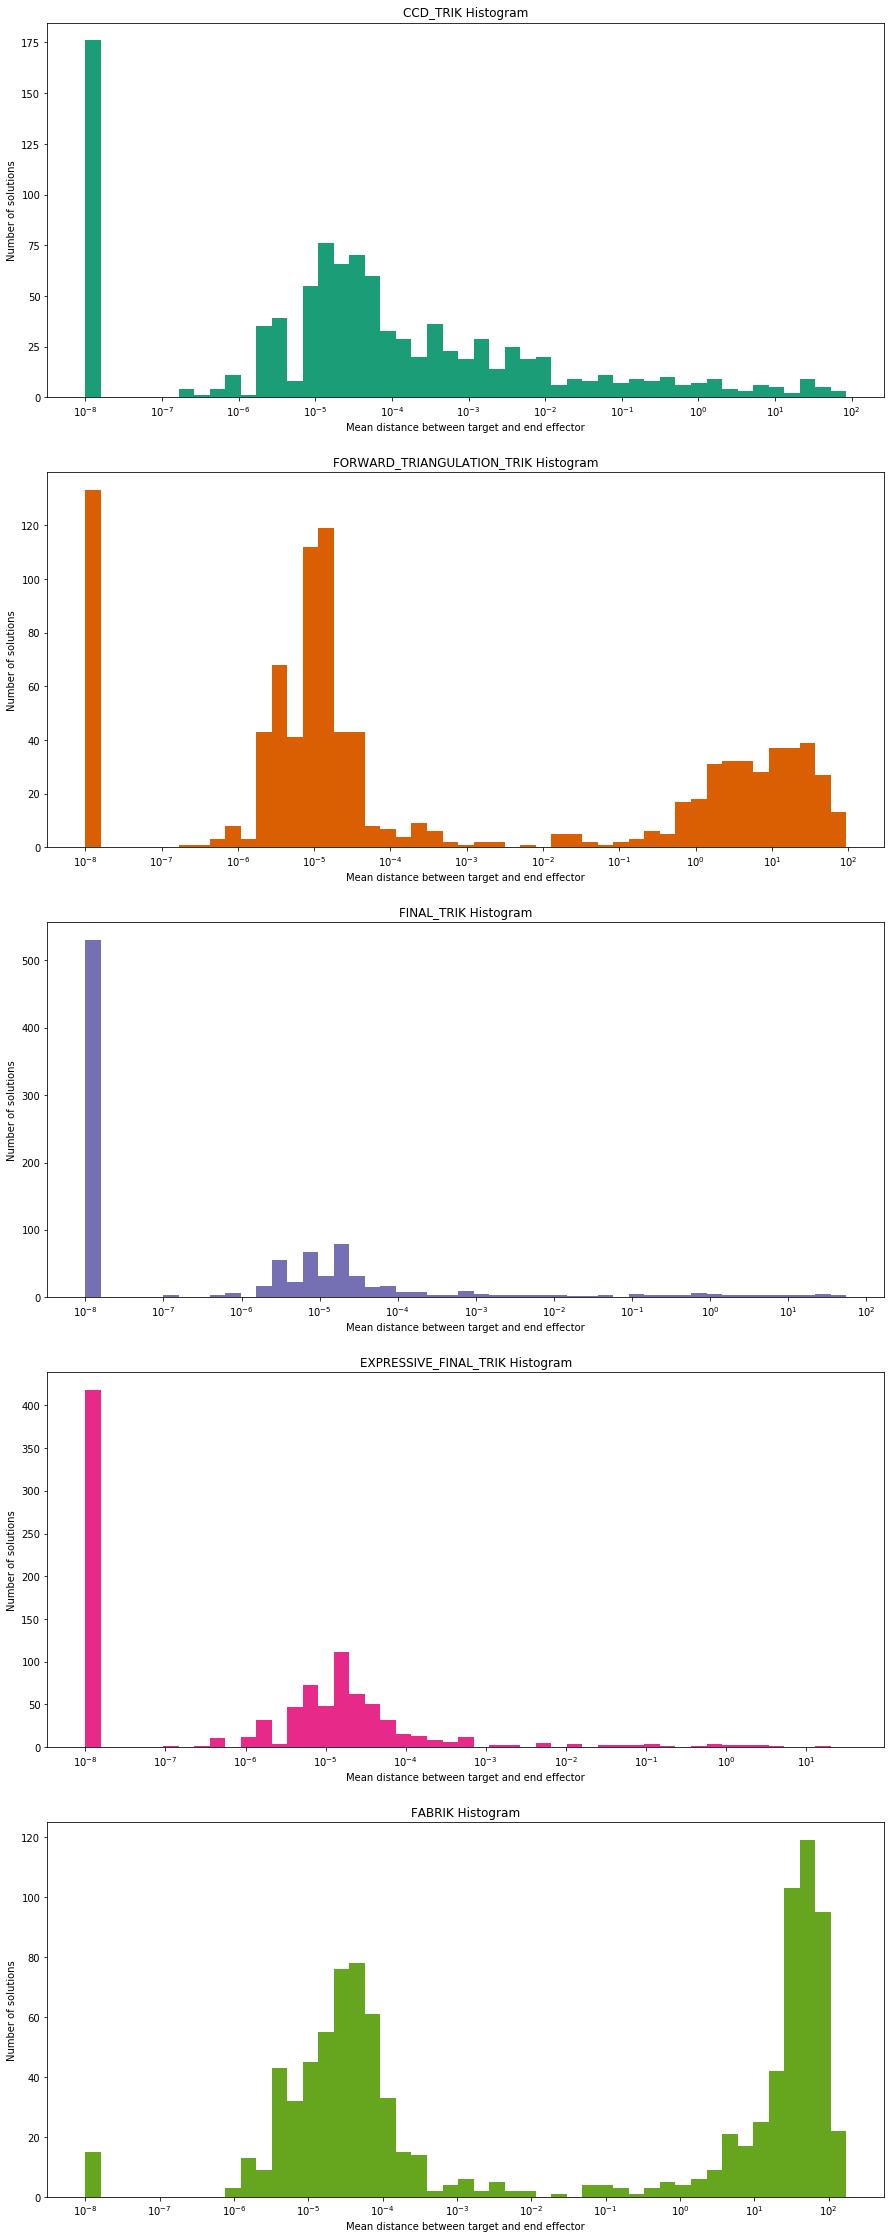

In [170]:
#Average over random topologies
file_name = "discontinuous_path_joints_7_postures_100_structures_10_seed_0"
plotHist(file_name, min_order = -8, bins = 50)

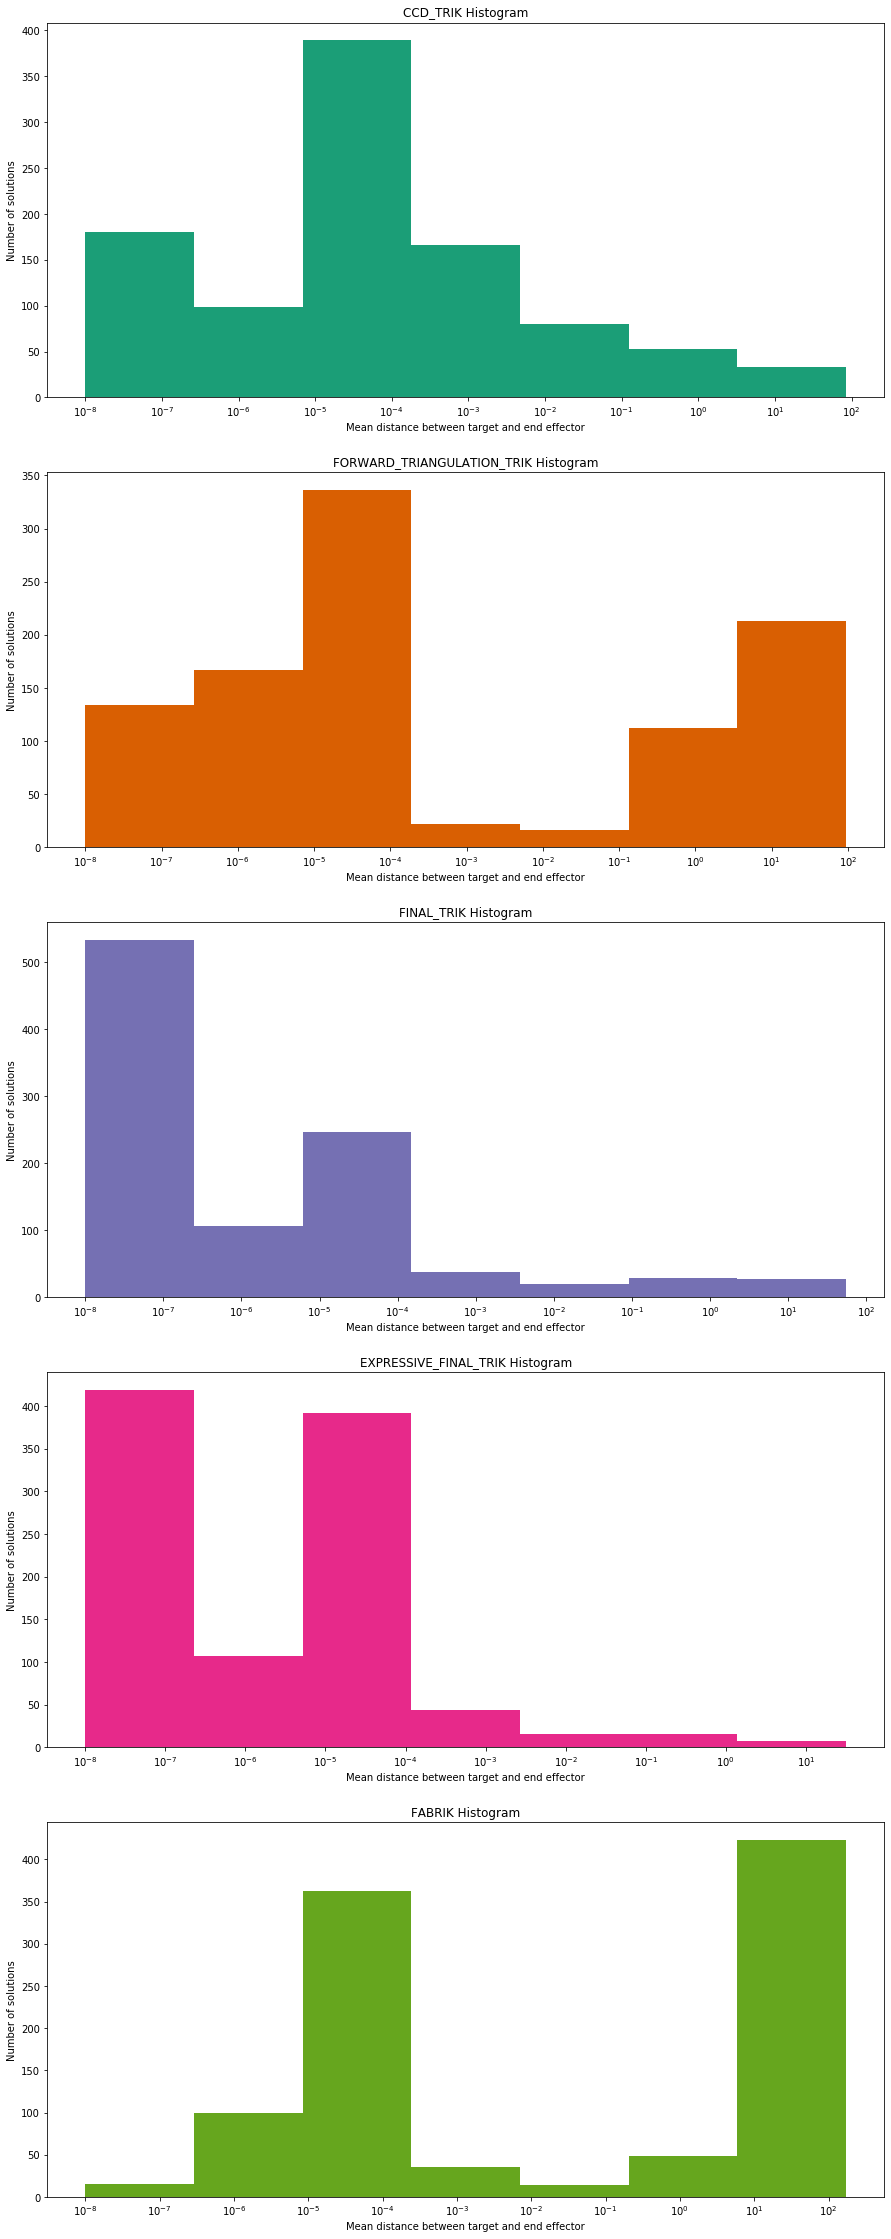

In [167]:
#Average over random topologies
file_name = "discontinuous_path_joints_7_postures_100_structures_10_seed_0"
plotHist(file_name, min_order = -8, bins = 8)

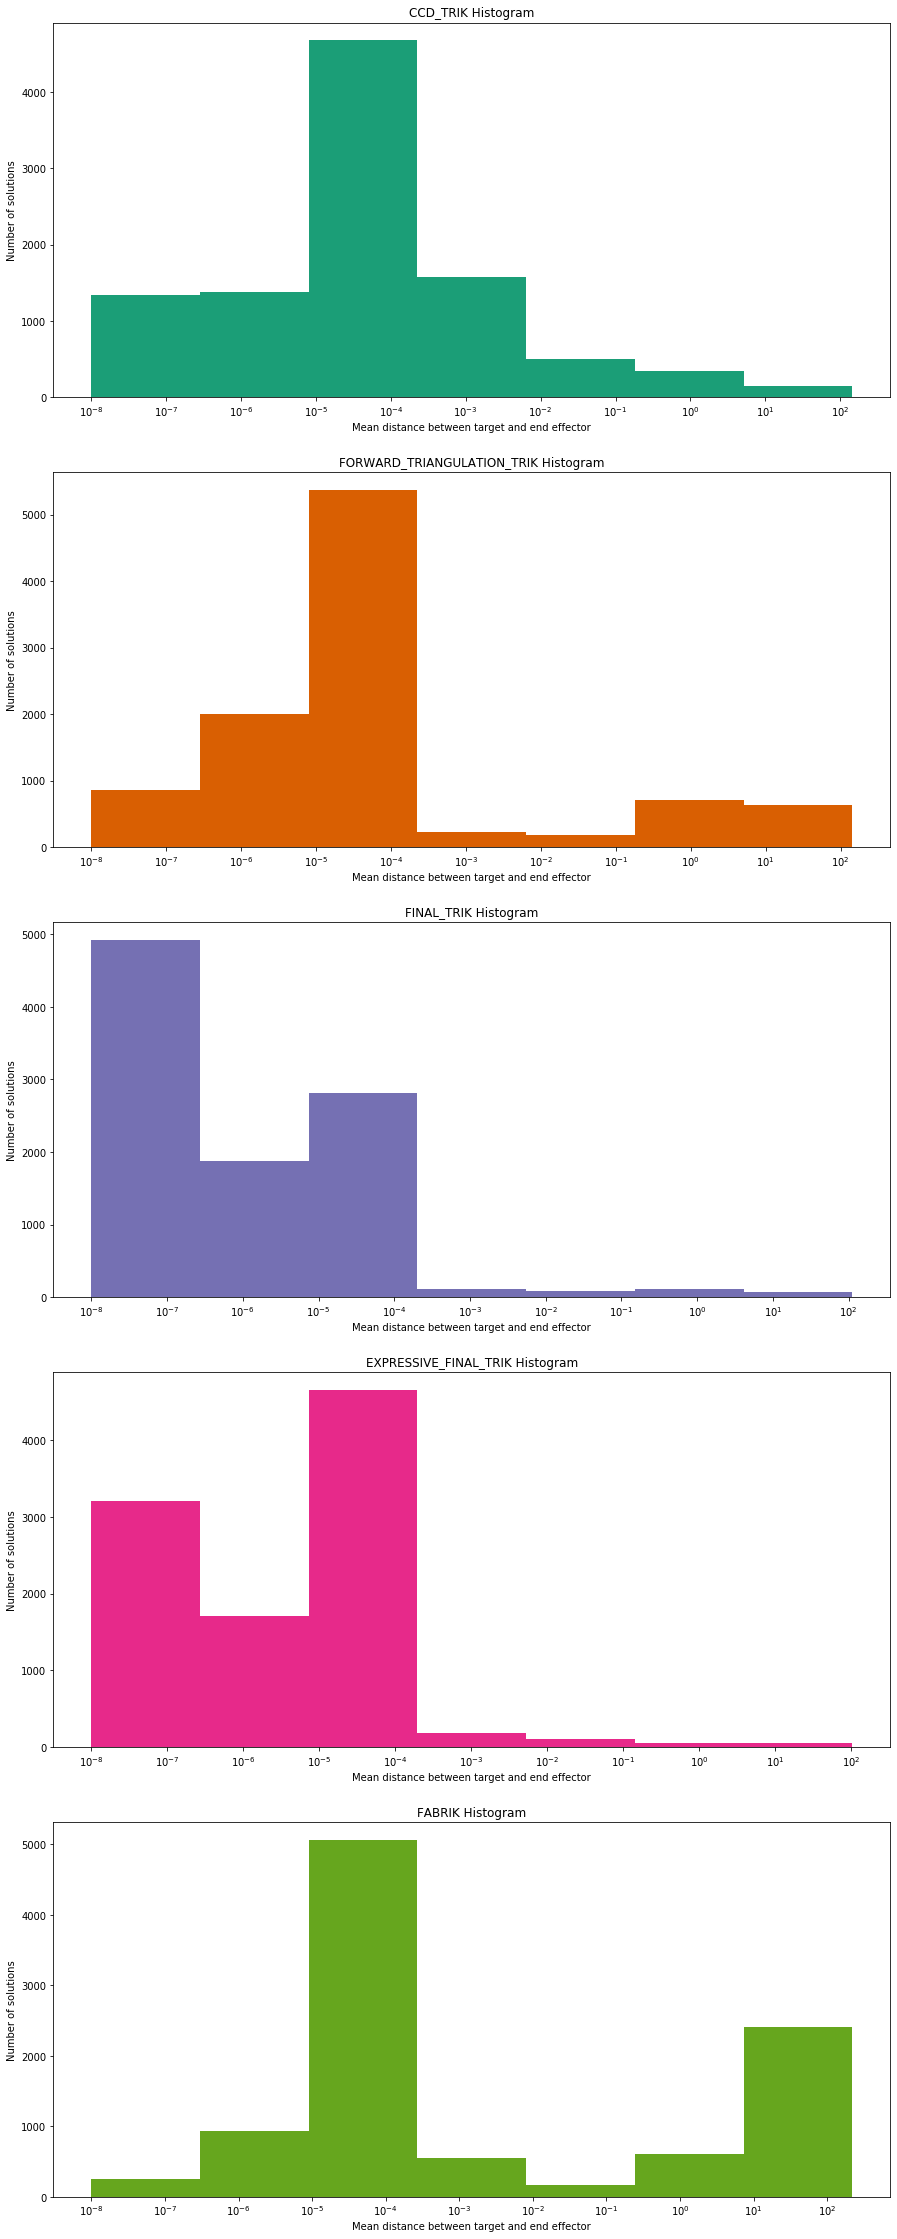

In [168]:
#Average over random topologies
file_name = "discontinuous_path_joints_16_postures_100_structures_100_seed_0"
plotHist(file_name, min_order = -8, bins = 8)